In [15]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='3'

In [16]:
import tensorflow as tf

In [17]:
from tensorflow.keras import models,layers

In [18]:
import matplotlib.pyplot as plt

In [19]:
imageSize=256

In [20]:
batchSize=32

In [21]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PotatoDisease",
     shuffle=True,
     image_size=(imageSize,imageSize),
     batch_size=batchSize
)
     

Found 2152 files belonging to 3 classes.


W0000 00:00:1733213696.864832   17743 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [22]:
class_names=dataset.class_names

In [23]:
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [24]:
len(dataset)

68

In [25]:
32*68

2176

In [26]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 2]


In [27]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0])

tf.Tensor(
[[[186. 185. 193.]
  [191. 190. 198.]
  [190. 189. 197.]
  ...
  [148. 147. 153.]
  [144. 143. 149.]
  [140. 139. 145.]]

 [[178. 177. 185.]
  [163. 162. 170.]
  [181. 180. 188.]
  ...
  [144. 143. 149.]
  [145. 144. 150.]
  [149. 148. 154.]]

 [[184. 183. 191.]
  [194. 193. 201.]
  [204. 203. 211.]
  ...
  [141. 140. 146.]
  [147. 146. 152.]
  [158. 157. 163.]]

 ...

 [[182. 176. 180.]
  [183. 177. 181.]
  [184. 178. 182.]
  ...
  [156. 146. 145.]
  [163. 153. 152.]
  [151. 141. 140.]]

 [[185. 179. 183.]
  [188. 182. 186.]
  [190. 184. 188.]
  ...
  [137. 127. 126.]
  [139. 129. 128.]
  [131. 121. 120.]]

 [[180. 174. 178.]
  [184. 178. 182.]
  [187. 181. 185.]
  ...
  [137. 127. 126.]
  [149. 139. 138.]
  [158. 148. 147.]]], shape=(256, 256, 3), dtype=float32)


In [28]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[143. 134. 137.]
  [131. 122. 125.]
  [124. 115. 118.]
  ...
  [146. 137. 140.]
  [147. 138. 141.]
  [150. 141. 144.]]

 [[110. 101. 104.]
  [122. 113. 116.]
  [144. 135. 138.]
  ...
  [165. 156. 159.]
  [159. 150. 153.]
  [156. 147. 150.]]

 [[132. 123. 126.]
  [151. 142. 145.]
  [142. 133. 136.]
  ...
  [151. 142. 145.]
  [150. 141. 144.]
  [152. 143. 146.]]

 ...

 [[129. 120. 125.]
  [166. 157. 162.]
  [160. 151. 156.]
  ...
  [161. 154. 161.]
  [171. 164. 171.]
  [169. 162. 169.]]

 [[172. 163. 168.]
  [132. 123. 128.]
  [118. 109. 114.]
  ...
  [171. 164. 171.]
  [158. 151. 158.]
  [159. 152. 159.]]

 [[131. 122. 127.]
  [135. 126. 131.]
  [154. 145. 150.]
  ...
  [177. 170. 177.]
  [175. 168. 175.]
  [196. 189. 196.]]]


In [29]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0].shape)

(256, 256, 3)


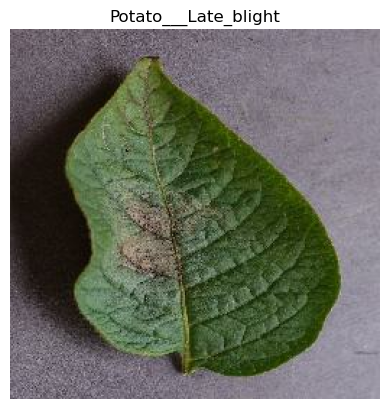

In [30]:
for image_batch,label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]])
    plt.axis('off')

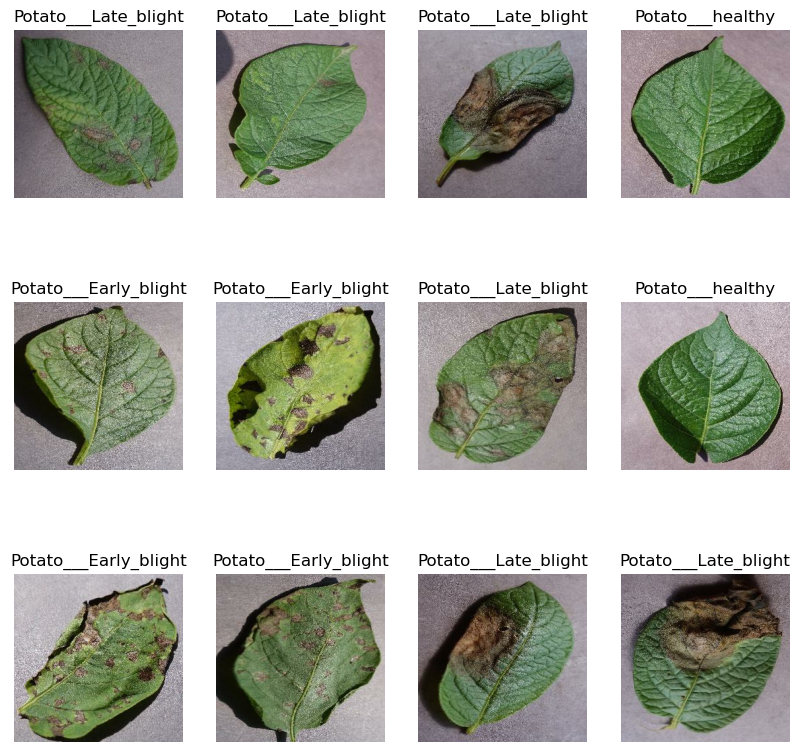

In [31]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

**80%->Training.20%==> 10% validation and 10% test**

In [32]:
train_size=0.8

In [33]:
len(dataset)*train_size

54.400000000000006

In [34]:
train_Ds=dataset.take(54)

In [35]:
len(train_Ds)

54

In [36]:
test_Ds=dataset.skip(54)

In [37]:
len(test_Ds)


14

In [38]:
val_size=0.1

In [39]:
len(dataset)*val_size

6.800000000000001

In [40]:
val_Ds=test_Ds.take(6)

In [41]:
len(val_Ds)

6

In [42]:
test_Ds=test_Ds.skip(6)

In [43]:
len(test_Ds)

8

In [44]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size,seed=12)
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    return train_ds,val_ds,test_ds
    

In [45]:
train_ds,val_ds,test_ds=get_dataset_partitions_tf(dataset)

In [46]:
len(train_ds)

54

In [47]:
len(val_ds)

6

In [48]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

# Creating Layers for Preprocessing

In [49]:
#!pip install --upgrade tensorflow


In [51]:
resize_and_rescale=tf.keras.Sequential([
    layers.Resizing(imageSize,imageSize),
    layers.Rescaling(1.0/255)
])

In [55]:
data_augmentation=tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)])